# Sales Analysis

## Import Necessary Libraries

In [74]:
import pandas as pd

## Data Reading

#### Task 1 : Merge The 12 Months of Sales Data Into a Single CSV File

In [2]:
# Membaca satu data dalam suatu file directory.
df = pd.read_csv("./Sales_Data/Sales_January_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
# Membaca semua data dan menggabungkan kedalam 1 file.

path = "./Sales_Data" # inisiasikan nama folder yang berisi data-data.
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame() # Buat variabel kosong untuk menyimpan DataFrame.

for file in files:
    df = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, df])
# --> Untuk setiap file yang berada dalam folder, buatkan sebagai 1 DataFrame.
    
all_months_data.to_csv("all_data.csv", index=False)
# --> Simpan file data kedalam format csv, dan hilangkan indeks baris.
    

#### Read in Updated DataFrame

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Cleansing

##### Drop Rows of NaN

In [4]:
# Cari data yang berisikan NaN pada setiap baris dan kolom.
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Hapus data yang berisikan NaN.
all_data = all_data.dropna(how='all')
all_data.reset_index(drop = True) # --> Mengurutkan indeks kembali.
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Task 2 : Get rid of text in Order Date column
mengambil tulisan di dalam kolom Order Date (ataupun kolom manapun).

In [8]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make Columns Correct Type

In [17]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Data Wrangling

#### Task 3 : Augment Data with Additional Columns

##### Add Month Column

In [18]:
# Cara Pertama.

# Buat kolom baru yang berisikan data bulan --> nama kolomnya adalah 'Month'.
all_data['Month'] = all_data['Order Date'].str[0:2]

# Jadikan tipe data di kolom 'Month' menjadi tipe integer(angka).
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [38]:
# Cara Kedua.
all_data['Month_2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


In [41]:
# Bersihkan data kembali untuk kolom yang tidak diperlukan.

del all_data['Month_2']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Add City Column

In [42]:
# Membuat kolom baru yang berisikan data nama kota dan kode wilayah.

# 1. Fungsi untuk mendapatkan nama kota pada kolom 'Purchase Address'.
def get_city(address):
    return address.split(",")[1].strip(" ")

# 2. Fungsi untuk mendapatkan kode wilayah pada kolom 'Purchase Address'.
def get_state(address):
    return address.split(",")[2].split(" ")[1]

# 3. Panggil fungsi get_city dan get_state menggunakan fungsi lambda. 
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Exploration Data Analysis (EDA)

#### Question 1 : What was the best month for sales? and How much was earned that month?

In [43]:
# Membuat rumus sederhana untuk mengetahui jumlah penjualan.
# Pemasukan penjualan = Jumlah pesanan x harga barang
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [44]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Dari hasil diatas, kita dapat menyimpulkan bahwa penjualan tertinggi itu terjadi pada bulan ke-12 (bulan Desember).

## Data Visualization 1

range(1, 13)


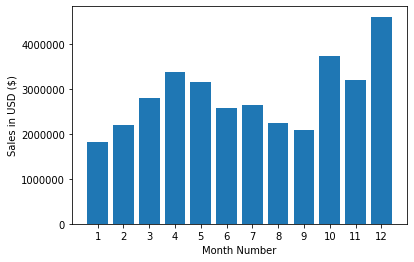

In [45]:
months = range(1,13)
print(months)

plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.show()

#### Question 2 : What city sold the most product

In [64]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


In [68]:
# Mengurutkan sales dari yang terbesar ke yang terkecil
datasales = all_data.groupby(['City']).sum()
datasales.sort_values(by=['Sales'], ascending = False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Seattle (WA),16553,2.733296e+06,104941,2.747755e+06
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06


## Data Visualization 2

Dari data diatas kita mengetahui bahwa kota San Fransisco (CA) adalah kota yang paling banyak penjualan produknya. Adapun kota yang paling rendah dalam penjualan produknya adalah kota Portlannd (ME). 

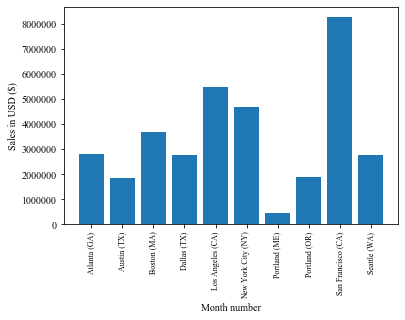

In [99]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby(['City'])]

plt.bar(cities,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Question 3 : What time should we displat advertisements to maximize likelihood of customer's buying product?

In [101]:
# Tambahkan kolom baru untuk keterangan 'jam' dan 'menit'.
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


## Data Visualization 3

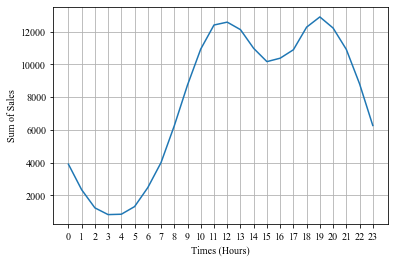

In [106]:
cat = [time for time, df in all_data.groupby(['Hour'])]

plt.plot(cat, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(cat)
plt.xlabel('Times (Hours)')
plt.ylabel('Sum of Sales')
plt.grid()
plt.show()

Dari grafik diatas kita dapat menganalisis bahwa penjualan tertinggi itu berada diantara jam 11 s.d 12 siang dan jam 6 s.d 8 malam.

#### Question 4 : What products are most often sold together?

In [108]:
# Buat variabel dummy untuk menyimpan data asli.
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Membuat sebuah dataframe yg berisi data 'Order ID' dan 'Product'.
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby.
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2 = df[['Order ID', 'Grouped']].drop_duplicates() 

In [109]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary.

from itertools import combinations
from collections import Counter

In [110]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Dari data diatas kita dapat mengetahui 10 barang/produk yang paling sering terjual bersama.

## Data Visualization 4

#### Question 5 : What product sold the most? Why do you think it sold the most?

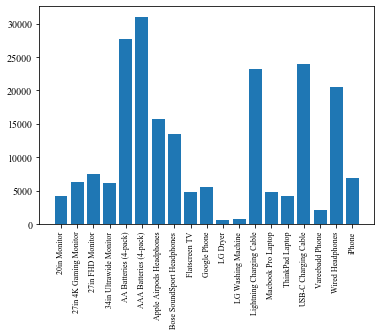

In [115]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

cat = [each for each, df in product_group]
plt.bar(cat, quantity_ordered)
plt.xticks(cat, rotation = 'vertical', size=8)
plt.show()

Dari grafik diatas, dapat kita analisis produk yang paling banyak terjual adalah 'AAA Batteries(4-pack)'. Adapun produk yang paling sedikit terjual adalah 'LG Dryer' dan 'LG Washing Machine'.

## Data Visualization 5

#### Task 5 : Adding Two Different Graphic with Two Different Y Ticks(Label)

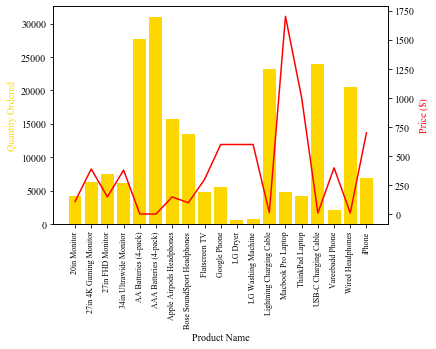

In [122]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-l.

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(cat, quantity_ordered, color = 'gold')
ax2.plot(cat, prices, color = 'red')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'gold')
ax2.set_ylabel('Price ($)', color = 'red')
ax1.set_xticklabels(cat, rotation = 'vertical', size=8)

fig.show()

Grafik diatas merupakan grafik hubungan besar harga produk terhadap jumlah produk yang dipesan atau terjual. Hasil analisis tersebut dapat kita buat menjadi beberapa poin diantaranya :
1. Semakin tinggi harga suatu produk, maka jumlah orderan produk sedikit.
2. Semakin rendah harga suatu produk, maka jumlah orderan produk banyak.